## Modelo para o Sensor CEI

Este dataset **"DataCEI.csv"** possui informações dispostas em colunas sobre as características dos objetos que passam pelo sensor:

* **Tamanho**:  Segue a classificação do CEI2020 (Tamanho='0' - Grande 100%).
* **Referencia**:  Referência dinâmica do *Threshold.
* **NumAmostra**:  Número de amostras adquiridas.
* **Area**:  Somatório das Amplitudes das amostras.
* **Delta**:  Máxima Amplitude da amostra.
* **Output1**:  Peça tipo 1.
* **Output2**:  Peça tipo 2.



### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Vamos começar lendo o arquivo DataCEI.csv em um dataframe do pandas.

In [2]:
DataSet=pd.read_csv('arruela.csv')

In [3]:
DataSet.head()

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,17:56:39,53,25,69,81,68,1,0
1,17:56:41,53,26,89,87,56,1,0
2,17:56:52,53,27,68,69,55,1,0
3,17:56:58,53,29,71,72,50,1,0
4,17:57:04,53,30,71,61,41,1,0


In [4]:
DataSet.drop(['Hora','Tamanho','Referencia'],axis=1,inplace=True)

In [5]:
DataSet.head()

,NumAmostra,Area,Delta,Output1,Output2
0,69,81,68,1,0
1,89,87,56,1,0
2,68,69,55,1,0
3,71,72,50,1,0
4,71,61,41,1,0


In [6]:
DataSet.describe()

,NumAmostra,Area,Delta,Output1,Output2
count,257.000000,257.000000,257.000000,257.000000,257.000000
mean,59.840467,63.743191,54.571984,0.365759,0.634241
std,16.789885,30.741427,35.690670,0.482582,0.482582
min,3.000000,6.000000,17.000000,0.000000,0.000000
25%,50.000000,46.000000,38.000000,0.000000,0.000000
50%,59.000000,56.000000,44.000000,0.000000,1.000000
75%,69.000000,68.000000,53.000000,1.000000,1.000000
max,110.000000,201.000000,251.000000,1.000000,1.000000


### Váriaveis do *Dataset*

In [7]:
DataSet.columns

Index(['NumAmostra', 'Area', 'Delta', 'Output1', 'Output2'], dtype='object')

### Número de Peças

#### Vamos classificar os grupos pelo número de peças: 
1. Grupo com uma peça
2. Grupo com duas peças

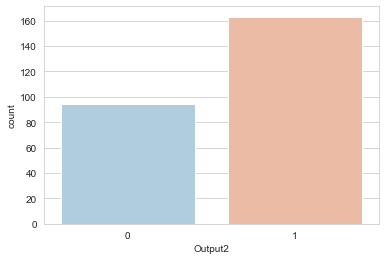

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

#### Gráfico da distribuição das áreas das peças

c:\users\rodrigo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


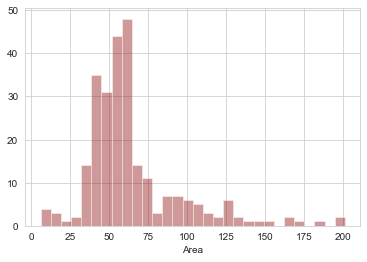

In [9]:
sns.distplot(DataSet['Area'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

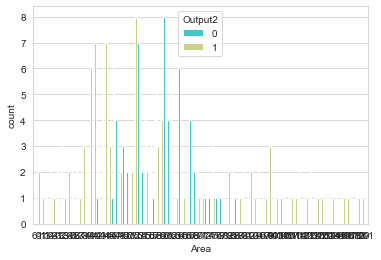

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

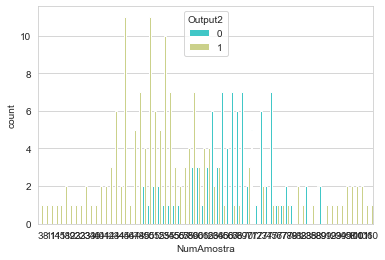

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

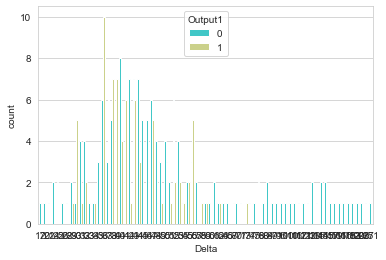

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Delta',hue='Output1',data=DataSet,palette='rainbow')
plt.show()

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino.

### Matrizes X e y

In [13]:
#X = DataSet[[ 'NumAmostra', 'Area', 'Delta']]
#y = DataSet[['Output1','Output2']]

### Relação entre as variáveis preditoras

####  Algumas questões importantes
1. Pelo menos um dos preditores ***x1, x2, ... ,x5***  é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar **y**, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

**Gráficos simples de dispersão**

Pelos gráficos abaixo percebemos ... nossa variável de resposta

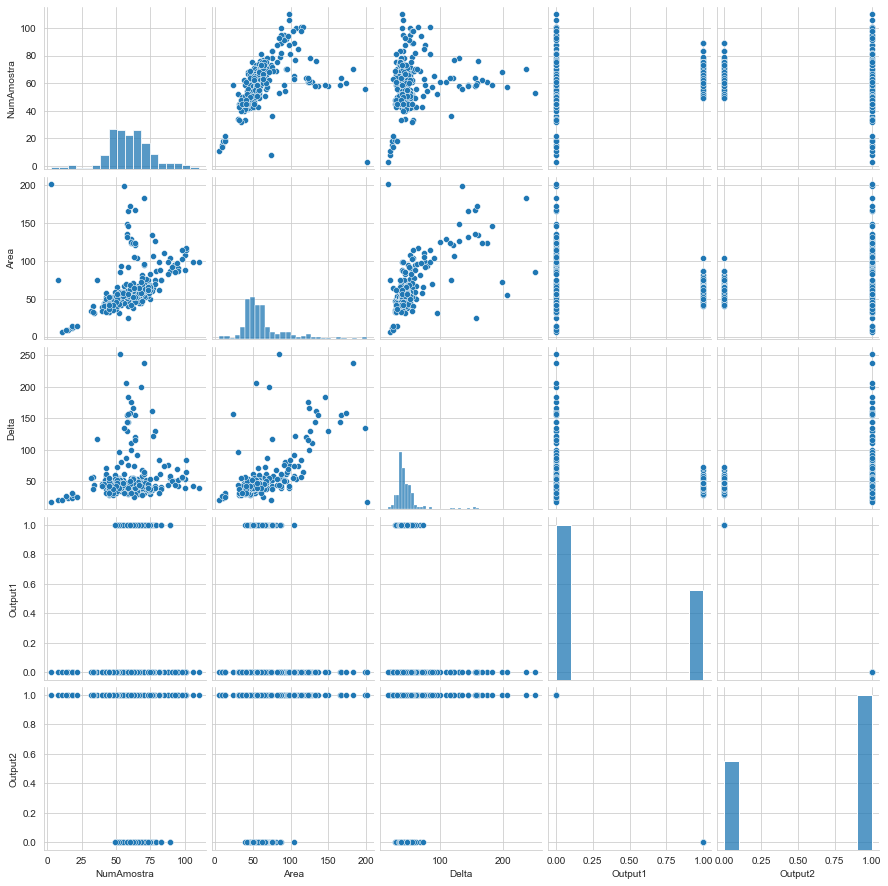

In [14]:
sns.pairplot(DataSet)
plt.show()

**Mapa de Calor**

O gráfico abaixo mostra através de uma escala de cores a correlação entre as variáveis do *Dataset*. Se observarmos as cores deste gráfico, a variável preditora **'Area'** possui maior correlação com a variável de resposta **'Output'** e a variável **'NumAmostra'** a menor.

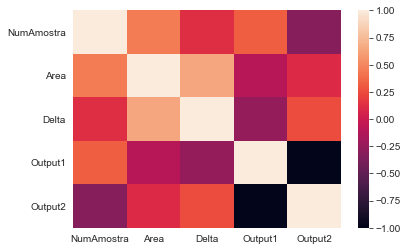

In [15]:
sns.heatmap(DataSet.corr())
plt.show()

## Normalização dos Dados

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
DataScaled=scaler.fit_transform(DataSet)
DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['NumAmostra', 'Area', 'Delta', 'Output1','Output2'])


In [17]:
DataSetScaled.head()

,NumAmostra,Area,Delta,Output1,Output2
0,0.546603,0.562449,0.376967,1.31683,-1.31683
1,1.740121,0.758006,0.040089,1.31683,-1.31683
2,0.486927,0.171334,0.012016,1.31683,-1.31683
3,0.665955,0.269113,-0.128350,1.31683,-1.31683
4,0.665955,-0.089408,-0.381009,1.31683,-1.31683


### Conjunto de dados para o treinamento

In [18]:
X = DataSetScaled.drop(['Output1', 'Output2'],axis=1)
y = DataSet[['Output1','Output2']]

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

print(y_test)
print(X_test)

     Output1  Output2
169        0        1
161        0        1
69         1        0
223        0        1
93         1        0
..       ...      ...
255        0        1
65         1        0
154        0        1
54         1        0
66         1        0

[78 rows x 2 columns]
     NumAmostra      Area     Delta
169    2.098176  0.758006 -0.352936
161    0.128872  0.236520  0.012016
69     0.427251 -0.089408 -0.296789
223   -3.093626  0.334299 -0.970546
93    -0.646914 -0.447930 -0.212570
..          ...       ...       ...
255   -0.885618 -0.904230 -0.633668
65     0.188548 -0.122001 -0.381009
154   -0.408211 -0.350151 -0.324863
54    -0.229183  0.106149  0.208528
66     0.844983 -0.024223 -0.324863

[78 rows x 3 columns]


## Criando o Modelo de MPL

In [20]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
#N_hidden = 4
N_hidden = 4
N_output = 2
#learnrate = 0.1
learnrate = 0.5

## Inicialização dos pesos da MPL (Aleatório)

In [21]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
print('Pesos da Camada Oculta:')
print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[-0.01111525 -0.04267299  0.06573512  0.01013728]
 [ 0.0073134   0.00021853 -0.15705017 -0.01390683]
 [-0.02013369 -0.08615575  0.0415067   0.12830932]]
Pesos da Camada de Saída:
[[-0.002859   -0.00237002]
 [-0.04772709  0.11000549]
 [-0.04811484 -0.07558371]
 [ 0.10665925 -0.01856265]]


## Algoritmo Backpropagation

In [22]:
epochs = 20000
#epochs = 35000
last_loss=None
EvolucaoError=[]
IndiceError=[]

for e in range(epochs):
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print("Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)

Erro quadrático no treinamento:  0.25511400660649497
Erro quadrático no treinamento:  0.2139723387613303
Erro quadrático no treinamento:  0.06327361494170093
Erro quadrático no treinamento:  0.037384054258786374
Erro quadrático no treinamento:  0.028229918690453264
Erro quadrático no treinamento:  0.02009432913589116
Erro quadrático no treinamento:  0.01580275511230584
Erro quadrático no treinamento:  0.013526581129013449
Erro quadrático no treinamento:  0.012370077062884321
Erro quadrático no treinamento:  0.01164155031613999
Erro quadrático no treinamento:  0.010521104719093892
Erro quadrático no treinamento:  0.009060703249999882
Erro quadrático no treinamento:  0.007559452643242686
Erro quadrático no treinamento:  0.0061777764409276185
Erro quadrático no treinamento:  0.0050353940623455214
Erro quadrático no treinamento:  0.004128692458058931
Erro quadrático no treinamento:  0.0034115320854725237
Erro quadrático no treinamento:  0.00283881830879886
Erro quadrático no treinamento:  

In [23]:
### Gráfico da Evolução do Erro

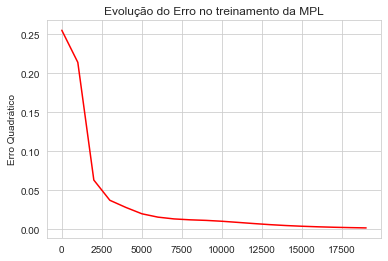

In [24]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

## Validação do modelo

In [25]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
predictions=0

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)

#-------------------------------------------    
    
#Cálculo do Erro da Predição
        ## TODO: Cálculo do Erro        
        if (output[0]>output[1]):
            if (yi[0]>yi[1]):
                predictions+=1
                
        if (output[1]>=output[0]):
            if (yi[1]>yi[0]):
                predictions+=1

print("A Acurácia da Predição é de: {:.3f}".format(predictions/n_records))
 


A Acurácia da Predição é de: 0.885
